In [2]:
import pandas as pd
import folium  #needed for interactive map
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

In [9]:
## demographic data
df=pd.read_csv('demographics.csv')

In [3]:
df.head(5)

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,601,17982,1006,1080,1342,1352,1321,2253,2149,2434,...,48.1,12,12.8,8.6,8.7,6.2,1.4,16.3,10816,20349
1,602,40260,2006,2440,2421,2953,2865,5124,5139,5947,...,31.4,16.3,17.9,12.2,10.6,7.7,2.9,21.2,16079,23282
2,603,52408,2664,3177,3351,3685,3585,6473,6775,6678,...,31,14.9,17.5,11.7,10.8,8.7,2.4,21.9,16804,26820
3,606,6331,347,331,461,474,469,707,933,776,...,45.3,10.2,20,11.7,11,1.8,0,12.8,12512,15730
4,610,28328,1438,1490,2044,2122,1985,3358,3778,3858,...,26.9,14.8,23.7,15.2,9.3,7.5,1.6,18.4,17475,23360


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 26 columns):
zipcode                    33120 non-null int64
5_years_or_less            33120 non-null int64
5-9_years                  33120 non-null int64
10-14_years                33120 non-null int64
15-19_years                33120 non-null int64
20-24_years                33120 non-null int64
25-34_years                33120 non-null int64
35-44_years                33120 non-null int64
45-54_years                33120 non-null int64
55-59_years                33120 non-null int64
60-64_years                33120 non-null int64
65-74_years                33120 non-null int64
75-84_years                33120 non-null int64
85_years_or_more           33120 non-null int64
households                 33120 non-null int64
$9,999_or_less             33120 non-null int64
$10,000-$14,999            33120 non-null object
$15,000-$24,999            33120 non-null object
$25,000-$34,999          

In [10]:
zipl=[10003,10276,10009,10010,10002,10012,10110,10249,10242,10199,10060,10113,10025,10026,10027, 10024, 10115, 8544, 8541,8543,8542]
df[df['zipcode'].isin(zipl)]
##

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
2449,8542,5373,217,159,208,629,1260,857,387,574,...,1.2,2.9,4.8,11.7,14.7,17.4,12.7,44.8,71725,102939
2559,10002,80736,3079,3171,3638,3922,5338,13938,12055,11182,...,15.5,12.6,14,8.8,10,14.2,7.1,31.3,33726,61946
2560,10003,57112,1545,911,764,7308,5714,15565,7843,5718,...,6.1,1.9,7,4.9,6.4,13,11.3,30.7,98151,161692
2565,10009,60865,1491,1838,1604,2220,6338,15577,7390,8248,...,12.7,7.7,9.6,7.2,8.4,12.3,11.2,31.9,59090,85207
2566,10010,31447,1014,611,588,1411,4081,8332,4648,3936,...,7.8,3.9,4.9,4,5.5,13.2,9.4,28.1,101718,154979
2568,10012,24163,771,384,681,459,2788,7480,3544,2484,...,7.4,2.3,4.5,6.3,7.3,10.9,10.5,28.7,100859,141430
2579,10024,58391,3307,2585,2412,1703,1604,10850,9191,9292,...,5.6,3.2,5.6,4.9,7,11.1,8.3,26.4,113839,202005
2580,10025,96068,4981,2987,4074,4348,7751,17603,12155,13487,...,9.9,5.4,7.7,8.3,6.9,12.1,9.7,28.7,74065,124739
2581,10026,38310,2964,1911,1930,1728,3374,7877,5373,5400,...,15.5,7.1,9.9,8.9,11.1,14.8,7.2,33.1,47264,79815
2582,10027,64413,3757,3173,3206,5858,8647,12091,8173,7473,...,19.8,6.8,10.2,8,11.6,12.7,9.6,33.9,40782,70034


In [17]:
demo=df[df['zipcode'].isin(zipl)]

In [18]:
demo.to_csv('demographics_campus_area.csv')

In [19]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2449 to 2621
Data columns (total 26 columns):
zipcode                    13 non-null int64
5_years_or_less            13 non-null int64
5-9_years                  13 non-null int64
10-14_years                13 non-null int64
15-19_years                13 non-null int64
20-24_years                13 non-null int64
25-34_years                13 non-null int64
35-44_years                13 non-null int64
45-54_years                13 non-null int64
55-59_years                13 non-null int64
60-64_years                13 non-null int64
65-74_years                13 non-null int64
75-84_years                13 non-null int64
85_years_or_more           13 non-null int64
households                 13 non-null int64
$9,999_or_less             13 non-null int64
$10,000-$14,999            13 non-null object
$15,000-$24,999            13 non-null object
$25,000-$34,999            13 non-null object
$35,000-$49,999            13 non-

In [3]:
df2=pd.read_csv('listings.csv')

In [14]:
df2.head(3)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464


In [8]:
df2.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode'],
      dtype='object')

In [12]:
df2.isnull().sum()

accommodates                      61
amenities                          0
availability_30                    0
bathrooms                        202
bed_type                           0
bedrooms                          95
beds                             109
cancellation_policy                0
city                              46
has_availability               59824
host_id                            0
id                                 0
instant_bookable                   0
latitude                           0
longitude                          0
metropolitan                       0
name                              41
price                              0
property_type                      4
review_scores_checkin          14346
review_scores_cleanliness      14280
review_scores_communication    14285
review_scores_location         14349
review_scores_rating           14200
review_scores_value            14354
room_type                          0
state                              0
w

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59824 entries, 0 to 59823
Data columns (total 29 columns):
accommodates                   59763 non-null float64
amenities                      59824 non-null object
availability_30                59824 non-null int64
bathrooms                      59622 non-null float64
bed_type                       59824 non-null object
bedrooms                       59729 non-null float64
beds                           59715 non-null float64
cancellation_policy            59824 non-null object
city                           59778 non-null object
has_availability               0 non-null float64
host_id                        59824 non-null int64
id                             59824 non-null int64
instant_bookable               59824 non-null object
latitude                       59824 non-null float64
longitude                      59824 non-null float64
metropolitan                   59824 non-null object
name                           59783 non-nu

In [106]:
df2.zipcode.value_counts()

11211         2043
11206         1405
11221         1371
20009         1270
20002         1270
10002         1241
11216         1162
20001         1148
10009         1143
11238         1054
11222.0        925
10025          924
11237          868
10031.0        802
10011          771
10003          765
10014          729
11249          704
10029          700
11215          693
10019.0        690
10036.0        671
20003          622
10027.0        611
11233          598
11225          593
11226          577
10012          522
20010          487
10023          478
              ... 
11239            1
11220.0          1
11385-2308       1
20372            1
10704            1
11580            1
60660-1448       1
10705            1
10021.0          1
11413.0          1
11420.0          1
10003-8623       1
05340            1
07310            1
80110.0          1
10002-2289       1
20781            1
11426-1175       1
11226.0          1
10471.0          1
20007-3413       1
10118       

In [15]:
df2['zipcode']=df2['zipcode'].str[:5]

In [18]:
df2['zipcode'].head(5)

0    10464
1    10464
2    10464
3    10464
4    10464
Name: zipcode, dtype: object

In [20]:
zipl=['10003','10276','10009','10010','10002','10012','10110','10249','10242','10199','10060','10113','10025',
      '10026','10027', '10024', '10115', '08544', '08541','08543','08542']

df22=df2[df2['zipcode'].isin(zipl)]

In [21]:
len(df22)

7169

In [5]:
calendar=pd.read_csv('calendar.csv')
calendar.head(3)

,listing_id,date,available,price,metro_area
0,2515,2018-03-05,t,69.0,NYC
1,2515,2018-03-04,t,69.0,NYC
2,2515,2018-03-03,t,69.0,NYC


In [22]:
calendar.metro_area.value_counts()

NYC        14874845
dc          2842620
chicago     1900555
boston      1308890
denver       914325
Name: metro_area, dtype: int64

In [23]:
new=df22.merge(calendar, left_on='id',right_on='listing_id',how='inner')
new.head(3)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,price_y,metro_area
0,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,...,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-26,f,NaN,NYC
1,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,...,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-25,f,NaN,NYC
2,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,...,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-24,f,NaN,NYC


In [24]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616685 entries, 0 to 2616684
Data columns (total 34 columns):
accommodates                   float64
amenities                      object
availability_30                int64
bathrooms                      float64
bed_type                       object
bedrooms                       float64
beds                           float64
cancellation_policy            object
city                           object
has_availability               float64
host_id                        int64
id                             int64
instant_bookable               object
latitude                       float64
longitude                      float64
metropolitan                   object
name                           object
price_x                        float64
property_type                  object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
revi

In [145]:
new.to_csv('joined_allzip.csv')

In [26]:
new.rename(columns = {'price_x':'listing_price', 'price_y':'daily_price'}, inplace = True)

In [27]:
new.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'listing_price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'listing_id', 'date', 'available',
       'daily_price', 'metro_area'],
      dtype='object')

In [29]:
new.state.value_counts()

NY    2616685
Name: state, dtype: int64

In [30]:
new.zipcode.value_counts()

10002    455520
10009    419020
10003    377410
10025    338355
10027    302585
10012    269005
10026    169360
10024    162425
10010    123005
Name: zipcode, dtype: int64

In [31]:
new.id.nunique()

7169

In [32]:
new.listing_id.nunique()## number of unique ids

7169

In [33]:
nyu=new[(new.zipcode=='10003') | (new.zipcode=='10002') |(new.zipcode=='10009') | (new.zipcode=='10010')]

In [34]:
nyu.id.nunique()

3767

In [41]:
df22.price.describe()## the distribution of listing price

count    7169.000000
mean      181.014088
std       291.917813
min        10.000000
25%        90.000000
50%       135.000000
75%       200.000000
max      9999.000000
Name: price, dtype: float64

In [42]:
# since we have some outliers, it is better to delete them for visuals, threshold price >=40 <= 400
clean_df=df22[(df22['price'] >= 40) & (df22['price'] <= 400)]
clean_df.price.describe()


count    6782.000000
mean      148.474344
std        76.454127
min        40.000000
25%        90.000000
50%       130.000000
75%       190.000000
max       400.000000
Name: price, dtype: float64

In [210]:
new.isnull().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                        11680
bed_type                             0
bedrooms                          3285
beds                              4745
cancellation_policy                  0
city                                 0
has_availability               2616685
host_id                              0
id                                   0
instant_bookable                     0
latitude                             0
longitude                            0
metropolitan                         0
name                              3285
listing_price                        0
property_type                        0
review_scores_checkin           597505
review_scores_cleanliness       596775
review_scores_communication     596775
review_scores_location          598235
review_scores_rating            593490
review_scores_value             597870
room_type                

In [43]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
folium_map

In [47]:
## location map
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")



for i in range(0,len(clean_df)):
    marker = folium.CircleMarker([clean_df["latitude"].iloc[i],clean_df["longitude"].iloc[i]],radius=2,color="#0A8A9F",fill=True)
    marker.add_to(folium_map)
folium_map.save("mapOutput.html")

##

In [ ]:
## heatmap

In [49]:
tooltip = 'Click me!'
folium_hmap = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB positron")
marker = folium.Marker([40.729, -73.996],popup='<b>NYU</b>', tooltip=tooltip)
marker.add_to(folium_hmap)
marker2= folium.Marker([40.807, -73.962],popup='<b>Columbia University</b>', tooltip=tooltip)
marker2.add_to(folium_hmap)
hm_wide = HeatMap(clean_df[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(),radius=8, max_zoom=5)
folium_hmap.add_child(hm_wide)
folium_hmap

In [ ]:
## circle marker map 

In [261]:
map4 = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12,tiles="CartoDB dark_matter")
marker = folium.Marker([40.729, -73.996],popup='<b>NYU</b>', tooltip=tooltip)
marker.add_to(folium_hmap)
marker2= folium.Marker([40.807, -73.962],popup='<b></b>', tooltip=tooltip)
marker2.add_to(map4)
for i in range(df_clean.shape[0]):
    threshold=130
    radius = df_clean['price'].iloc[i]/20
    if df_clean['price'].iloc[i] >= threshold:
        color="#E37222" # tangerine
    else:
        color="#0A8A9F" # teal
    
    folium.CircleMarker([df_clean["latitude"].iloc[i],df_clean["longitude"].iloc[i]],
                        radius=radius,
                        color=color,
                        fill=True).add_to(map4)
map4.save('map4.html')

In [256]:
df_clean.price.describe()

count    6940.00000
mean      152.34438
std        85.32332
min        22.00000
25%        90.00000
50%       130.00000
75%       195.00000
max       499.00000
Name: price, dtype: float64

In [262]:
subway=pd.read_csv('StationEntrances.csv')
subway.head(3)

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891


In [278]:
line=subway[subway['Station_Name'].str.contains('116th|110th|103th|96th|86th|79th|72th|w 4st|14th')]
line

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
89,BMT,4 Avenue,86th St,40.622687,-74.028398,R,NaN,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,4th Ave,86th St,SW,40.622656,-74.028547
90,BMT,4 Avenue,86th St,40.622687,-74.028398,R,NaN,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,4th Ave,86th St,SE,40.622583,-74.028315
136,BMT,West End,79th St,40.613501,-74.000610,D,NaN,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,New Utrecht Ave,79th St,NW,40.612855,-74.000892
137,BMT,West End,79th St,40.613501,-74.000610,D,NaN,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,New Utrecht Ave,79th St,NE,40.612847,-74.000721
165,BMT,Sea Beach,86th St,40.592721,-73.978230,N,NaN,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,8th St,86th St,SE,40.592724,-73.978227
305,IND,8 Avenue,116th St,40.805085,-73.954882,B,C,NaN,NaN,NaN,...,FULL,NaN,False,NaN,False,Frederick Douglass Blvd,116th St,SW,40.804312,-73.955643
306,IND,8 Avenue,116th St,40.805085,-73.954882,B,C,NaN,NaN,NaN,...,FULL,NaN,False,NaN,False,Frederick Douglass Blvd,116th St,NW,40.804639,-73.955559
307,IND,8 Avenue,Cathedral Parkway-110th St,40.800605,-73.958158,B,C,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,Frederick Douglass Blvd,109th St,SW,40.800002,-73.958882
308,IND,8 Avenue,Cathedral Parkway-110th St,40.800605,-73.958158,B,C,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,Frederick Douglass Blvd,109th St,NE,40.800002,-73.958448
310,IND,8 Avenue,96th St,40.791646,-73.964699,B,C,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,Central Park West,96th St,SW,40.791642,-73.965009


In [ ]:
## seasonality analysis

In [50]:
new.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'listing_price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'listing_id', 'date', 'available',
       'daily_price', 'metro_area'],
      dtype='object')

In [51]:
new.date.max(),new.date.min()

('2018-05-04', '2017-05-02')

In [53]:
new.daily_price.describe()## distribution of daily price

count    823741.000000
mean        224.732785
std         356.572528
min          10.000000
25%         100.000000
50%         160.000000
75%         250.000000
max       10000.000000
Name: daily_price, dtype: float64

In [55]:
new.isnull().sum()

accommodates                         0
amenities                            0
availability_30                      0
bathrooms                        11680
bed_type                             0
bedrooms                          3285
beds                              4745
cancellation_policy                  0
city                                 0
has_availability               2616685
host_id                              0
id                                   0
instant_bookable                     0
latitude                             0
longitude                            0
metropolitan                         0
name                              3285
listing_price                        0
property_type                        0
review_scores_checkin           597505
review_scores_cleanliness       596775
review_scores_communication     596775
review_scores_location          598235
review_scores_rating            593490
review_scores_value             597870
room_type                

In [56]:
## only analyze on the listings with daily price
new_clean=new.dropna(subset=['daily_price'])

In [58]:
## we will only include the listings with daily price in range(40,500)
new_clean2=new_clean[(new_clean['daily_price']>= 40) & (new_clean['daily_price'] <= 500)]

In [59]:
new_clean2.daily_price.describe()## distribution of daily price

count    774697.000000
mean        177.667708
std          98.973695
min          40.000000
25%         100.000000
50%         150.000000
75%         225.000000
max         500.000000
Name: daily_price, dtype: float64

In [ ]:
## split the listings to summer and winter

In [60]:
new_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774697 entries, 365 to 2616311
Data columns (total 34 columns):
accommodates                   774697 non-null float64
amenities                      774697 non-null object
availability_30                774697 non-null int64
bathrooms                      769035 non-null float64
bed_type                       774697 non-null object
bedrooms                       773476 non-null float64
beds                           772742 non-null float64
cancellation_policy            774697 non-null object
city                           774697 non-null object
has_availability               0 non-null float64
host_id                        774697 non-null int64
id                             774697 non-null int64
instant_bookable               774697 non-null object
latitude                       774697 non-null float64
longitude                      774697 non-null float64
metropolitan                   774697 non-null object
name                   

In [65]:
import datetime
date =  pd.to_datetime(new_clean2['date'], format='%Y/%m/%d')
new_clean2['date']=pd.to_datetime(new_clean2['date'], format='%Y/%m/%d')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
new_clean2.head(2)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,daily_price,metro_area
365,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,...,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-03,t,250.0,NYC
366,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,...,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-02,t,250.0,NYC


In [ ]:
## defining each season

In [74]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start= year+'/03/21', end=year+'/06/20'),
               'summer': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
               'autumn': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
new_clean2['season'] = new_clean2.date.map(season_of_date)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [77]:
pd.set_option('display.max_columns', None)  
new_clean2.head(3)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,listing_price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,daily_price,metro_area,season
365,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-03,t,250.0,NYC,spring
366,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-02,t,250.0,NYC,spring
367,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-01,t,250.0,NYC,spring


In [158]:
gtp=gtp.sort_values()
gtp 

season  date
winter  3       173.981143
spring  3       174.366946
winter  2       174.559252
spring  4       174.599628
        5       174.770402
winter  1       176.167924
summer  7       176.888197
        6       177.095751
spring  6       177.870303
autumn  10      178.093585
summer  8       180.244018
autumn  9       180.519543
        12      180.931734
        11      181.102267
summer  9       181.659568
winter  12      185.555302
Name: daily_price, dtype: float64

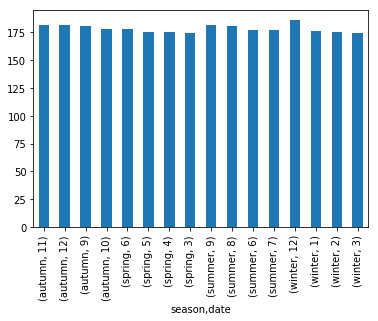

In [154]:
ax = gtp.plot(kind="bar")

Text(0.5, 1.08, 'Average Listing Price based on Seasonaility')

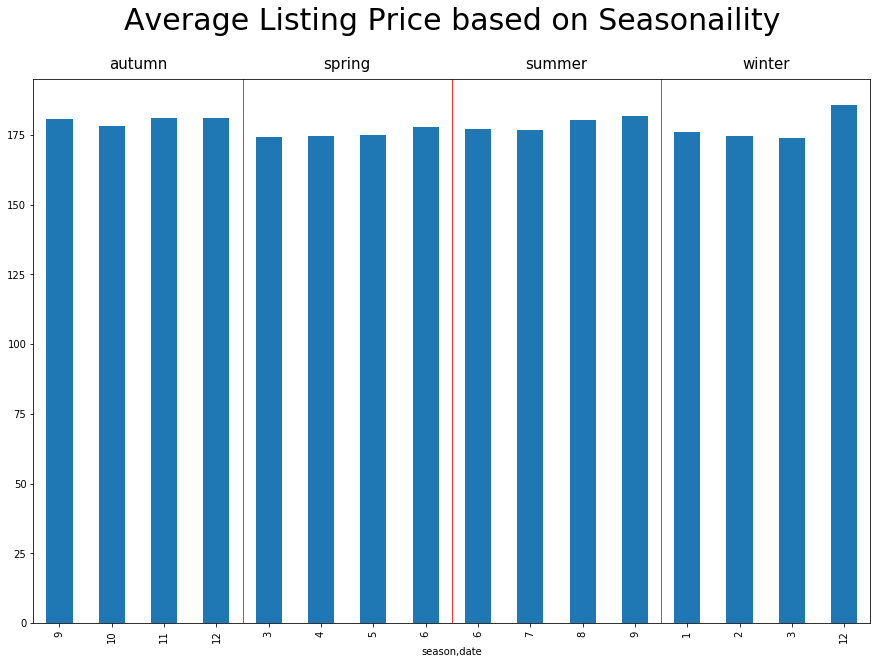

In [383]:
import numpy as np
df_season = new_clean2[["date", "season", "daily_price"]]
group = df_season.groupby(["season",df_season.date.dt.month]).mean()
total_price = group["daily_price"].groupby(level=0, group_keys=False)

plt.figure(figsize=(15,10))
gtp = total_price.nlargest(4)
gtp=gtp.sort_index()
ax = gtp.plot(kind="bar")

#draw lines and titles
count = gtp.groupby("season").count()
#new_index=['winter','spring','summer','autumn']
#count=count.reindex(index=new_index)
cs = np.cumsum(count)
for i in range(len(count)):
    title = count.index.values[i]
    ax.axvline(cs[i]-.5, lw=0.8, color="r")
    ax.text(cs[i]-(count[i]+1)/2., 1.02, title, ha="center",
            transform=ax.get_xaxis_transform(), fontsize=15)

# shorten xticklabels
ax.set_xticklabels([l.get_text().split(", ")[1][:-1] for l in ax.get_xticklabels()])
plt.title('Average Listing Price based on Seasonaility', y=1.08, fontsize=30)

In [ ]:
sns.kdeplot(x, color="green", shade=True)
sns.kdeplot(y, color="blue", shade=True)
plt.show()

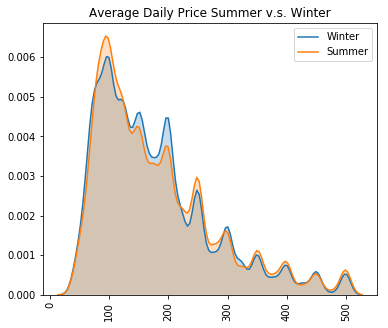

In [195]:
## simple visualizations about seasonality
import seaborn as sns
winter=new_clean2[new_clean2['season']=='winter']
summer=new_clean2[new_clean2['season']=='summer']
plt.figure(figsize=(6,5))
sns.kdeplot(winter.daily_price, shade=True, label='Winter')
sns.kdeplot(summer.daily_price,shade=True, label='Summer')
plt.xticks(rotation = 'vertical')
plt.title("Average Daily Price Summer v.s. Winter")
plt.show()

In [ ]:
## lets look at number of listings

In [212]:
date2 =  pd.to_datetime(new['date'], format='%Y/%m/%d')
new['date']=pd.to_datetime(new['date'], format='%Y/%m/%d')
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start= year+'/03/21', end=year+'/06/20'),
               'summer': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
               'autumn': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
new['season'] = new.date.map(season_of_date)

In [250]:
df_season2 = new[["date", "season", "id","available"]]
df_listings=new['id'].groupby([new.season,new.available]).agg({"id": "nunique"})
df_listings

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


id
season available      
autumn f          5771
       t          3015
spring f          6997
       t          4345
summer f          6220
       t          4044
winter f          5357
       t          2602

Text(0.5, 1.0, 'availability of listings based on seasonality')

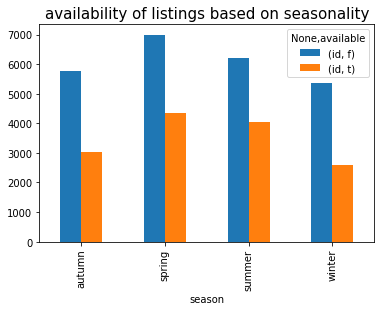

In [254]:
df_listings.unstack().plot.bar()
plt.title('availability of listings based on seasonality', fontsize=15)

In [238]:
new.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,listing_price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,daily_price,metro_area,season
0,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,2321422,6376519,f,40.762991,-73.913972,NYC,Our Astorian Alcove,175.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-26,f,NaN,NYC,spring
1,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,2321422,6376519,f,40.762991,-73.913972,NYC,Our Astorian Alcove,175.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-25,f,NaN,NYC,spring
2,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,2321422,6376519,f,40.762991,-73.913972,NYC,Our Astorian Alcove,175.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-24,f,NaN,NYC,spring
3,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,2321422,6376519,f,40.762991,-73.913972,NYC,Our Astorian Alcove,175.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-23,f,NaN,NYC,spring
4,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",0,1.0,Real Bed,3.0,3.0,strict,astoria,NaN,2321422,6376519,f,40.762991,-73.913972,NYC,Our Astorian Alcove,175.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10003,6376519,2018-04-22,f,NaN,NYC,spring


In [ ]:
## Hypothesis testing using welch t-test on daily price between winter and summer
## Null Hypothesis: there is no difference 

In [202]:
from scipy import stats

stats.shapiro(winter['daily_price'])


/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9041562676429749, 0.0)

In [203]:
stats.shapiro(summer['daily_price'])

(0.8996912240982056, 0.0)

In [204]:
stats.ttest_ind(winter['daily_price'], summer['daily_price'], equal_var = False)

Ttest_indResult(statistic=-9.33644954470508, pvalue=1.0008786319914101e-20)

In [205]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(summer['daily_price'], winter['daily_price'])


 Welch's t-test= 9.3364 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 413430.5991


In [ ]:
## we are going to dummy code our amenities, room_type, property_type for pre-processing

In [111]:
new_clean2.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                    4454
{"Wireless Internet","Air conditioning",Doorman,"Buzzer/wireless intercom",Heating,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Shampoo,"Lock on bedroom door","24-hour check-in","Hair dryer",Iron}                                                                                                                                                                                                 3204
{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Buzzer/wireless intercom",Heating,"Family/

In [112]:
new_clean2.room_type.value_counts()

Entire home/apt    414831
Private room       340245
Shared room         19621
Name: room_type, dtype: int64

In [114]:
room_type=pd.get_dummies(new_clean2.room_type)
property_type=pd.get_dummies(new_clean2.property_type)

In [113]:
new_clean2.property_type.value_counts()

Apartment             715707
Other                  14484
House                  12818
Townhouse              12536
Loft                   10126
Condominium             3767
Bed & Breakfast         2818
Boutique hotel           700
Villa                    287
Lighthouse               285
Dorm                     278
Guesthouse               256
Castle                   249
Serviced apartment       207
Cabin                    179
Name: property_type, dtype: int64

In [127]:
#Wifi
def wifi_function(s):
    s=s.lower()
    if 'wireless' in s:
        return 1
    else:
        return 0 
def ac_function(a):
    a=a.lower()
    if 'conditioning' in a:
        return 1
    else:
        return 0 
def doorman_function(a):
    a=a.lower()
    if 'doorman' in a:
        return 1
    else:
        return 0 
def kitchen_function(a):
    a=a.lower()
    if 'kitchen' in a:
        return 1
    else:
        return 0 
    

In [126]:
#new_clean2.head(5)
new_clean2['wifi']=new_clean2['amenities'].apply(lambda x: wifi_function(x))
new_clean2.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,listing_price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,daily_price,metro_area,season,wifi
365,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-03,t,250.0,NYC,spring,1
366,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-02,t,250.0,NYC,spring,1
367,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-01,t,250.0,NYC,spring,1
368,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-04-30,t,250.0,NYC,spring,1
369,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-04-29,t,250.0,NYC,spring,1


In [129]:
new_clean2['air_conditioning']=new_clean2['amenities'].apply(lambda x: ac_function(x))
new_clean2['doorman']=new_clean2['amenities'].apply(lambda x: doorman_function(x))
new_clean2['kitchen']=new_clean2['amenities'].apply(lambda x: kitchen_function(x))



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [132]:
new_clean2=pd.concat([new_clean2,room_type,property_type],axis=1)
new_clean2.head(4)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,listing_price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,listing_id,date,available,daily_price,metro_area,season,wifi,air_conditioning,doorman,kitchen,Entire home/apt,Private room,Shared room,Apartment,Bed & Breakfast,Boutique hotel,Cabin,Castle,Condominium,Dorm,Guesthouse,House,Lighthouse,Loft,Other,Serviced apartment,Townhouse,Villa
365,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-03,t,250.0,NYC,spring,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-02,t,250.0,NYC,spring,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-05-01,t,250.0,NYC,spring,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
368,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",29,1.0,Real Bed,1.0,1.0,flexible,new york,NaN,6759918,1498245,f,40.718293,-74.014019,NYC,Spacious loft in Greenwich Vlg. NYU,250.0,Apartment,10.0,9.0,9.0,10.0,95.0,9.0,Entire home/apt,NY,NaN,10012,1498245,2018-04-30,t,250.0,NYC,spring,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
new_clean2.isnull().sum()

accommodates                        0
amenities                           0
availability_30                     0
bathrooms                        5662
bed_type                            0
bedrooms                         1221
beds                             1955
cancellation_policy                 0
city                                0
has_availability               774697
host_id                             0
id                                  0
instant_bookable                    0
latitude                            0
longitude                           0
metropolitan                        0
name                              628
listing_price                       0
property_type                       0
review_scores_checkin          102722
review_scores_cleanliness      102389
review_scores_communication    102571
review_scores_location         102660
review_scores_rating           102048
review_scores_value            102993
room_type                           0
state       

In [255]:
## we will drop the listings that do not have listing score, and also drop has_availability, name, and weekly_price column
df_train=new_clean2.drop(['has_availability','name','weekly_price'],axis=1)
df_train=df_train.dropna(subset=['review_scores_checkin','review_scores_cleanliness',
                                 'review_scores_communication', 'review_scores_location',
                                 'review_scores_rating','review_scores_value'], axis=0)

In [256]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671642 entries, 365 to 2616311
Data columns (total 54 columns):
accommodates                   671642 non-null float64
amenities                      671642 non-null object
availability_30                671642 non-null int64
bathrooms                      667074 non-null float64
bed_type                       671642 non-null object
bedrooms                       670421 non-null float64
beds                           670416 non-null float64
cancellation_policy            671642 non-null object
city                           671642 non-null object
host_id                        671642 non-null int64
id                             671642 non-null int64
instant_bookable               671642 non-null object
latitude                       671642 non-null float64
longitude                      671642 non-null float64
metropolitan                   671642 non-null object
listing_price                  671642 non-null float64
property_type     

In [257]:
df_train.isnull().sum()

accommodates                      0
amenities                         0
availability_30                   0
bathrooms                      4568
bed_type                          0
bedrooms                       1221
beds                           1226
cancellation_policy               0
city                              0
host_id                           0
id                                0
instant_bookable                  0
latitude                          0
longitude                         0
metropolitan                      0
listing_price                     0
property_type                     0
review_scores_checkin             0
review_scores_cleanliness         0
review_scores_communication       0
review_scores_location            0
review_scores_rating              0
review_scores_value               0
room_type                         0
state                             0
zipcode                           0
listing_id                        0
date                        

In [261]:
## we are going to use median for missing value in bathrooms, bedrooms, and beds
df_train['beds'].fillna((df_train['beds'].median()), inplace=True)

In [262]:
df_train['bedrooms'].fillna((df_train['bedrooms'].median()), inplace=True)
df_train['bathrooms'].fillna((df_train['bathrooms'].median()), inplace=True)



In [265]:
df_train.isnull().sum()

accommodates                   0
amenities                      0
availability_30                0
bathrooms                      0
bed_type                       0
bedrooms                       0
beds                           0
cancellation_policy            0
city                           0
host_id                        0
id                             0
instant_bookable               0
latitude                       0
longitude                      0
metropolitan                   0
listing_price                  0
property_type                  0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
room_type                      0
state                          0
zipcode                        0
listing_id                     0
date                           0
available                      0
daily_price                    0
metro_area

In [267]:
## more useless columns to be dropped: city, host_id, id, metropolitan, zipcode, state, metro_area
df_train=df_train.drop(['city', 'host_id', 'id', 'metropolitan', 'zipcode', 'state'],axis=1)

In [269]:
df_train=df_train.drop(['metro_area'],axis=1)

In [276]:
## counting the amenities
count = df_train.amenities.apply(lambda x: len(x.split(',')))
df_train['count_amenities']=df_train.amenities.apply(lambda x: len(x.split(',')))

In [283]:
bed_type=pd.get_dummies(df_train.bed_type)
df_train=pd.concat([df_train,bed_type],axis=1)

In [288]:
cancellation_policy=pd.get_dummies(df_train.cancellation_policy)
df_train=pd.concat([df_train,cancellation_policy],axis=1)

In [291]:
df_train=df_train.drop(['amenities','bed_type','cancellation_policy','property_type','room_type','listing_id'],axis=1)

In [325]:
df_train.to_csv('train.csv')

In [292]:
df_train.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'instant_bookable', 'latitude', 'longitude', 'listing_price',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'date', 'available',
       'daily_price', 'season', 'wifi', 'air_conditioning', 'doorman',
       'kitchen', 'Entire home/apt', 'Private room', 'Shared room',
       'Apartment', 'Bed & Breakfast', 'Boutique hotel', 'Cabin', 'Castle',
       'Condominium', 'Dorm', 'Guesthouse', 'House', 'Lighthouse', 'Loft',
       'Other', 'Serviced apartment', 'Townhouse', 'Villa', 'count_amenities',
       'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'flexible',
       'moderate', 'strict', 'super_strict_30'],
      dtype='object')

In [298]:
df_train['instant_bookable']=df_train.instant_bookable.apply(lambda x : 1 if x == 't' else 0)
df_train['available']=df_train.available.apply(lambda x : 1 if x == 't' else 0)

In [305]:
def func_season(a):
    if a=='spring':
        return 1
    if a=='summer':
        return 2
    if a=='autumn':
        return 3
    else:
        return 4
df_train['season']=df_train['season'].apply(lambda x: func_season(x))




In [306]:
df_train.head(3)

,accommodates,availability_30,bathrooms,bedrooms,beds,instant_bookable,latitude,longitude,listing_price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,date,available,daily_price,season,wifi,air_conditioning,doorman,kitchen,Entire home/apt,Private room,Shared room,Apartment,Bed & Breakfast,Boutique hotel,Cabin,Castle,Condominium,Dorm,Guesthouse,House,Lighthouse,Loft,Other,Serviced apartment,Townhouse,Villa,count_amenities,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30
365,2.0,29,1.0,1.0,1.0,0,40.718293,-74.014019,250.0,10.0,9.0,9.0,10.0,95.0,9.0,2018-05-03,1,250.0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,1,1,0,0,0
366,2.0,29,1.0,1.0,1.0,0,40.718293,-74.014019,250.0,10.0,9.0,9.0,10.0,95.0,9.0,2018-05-02,1,250.0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,1,1,0,0,0
367,2.0,29,1.0,1.0,1.0,0,40.718293,-74.014019,250.0,10.0,9.0,9.0,10.0,95.0,9.0,2018-05-01,1,250.0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,1,1,0,0,0


In [ ]:
## we are ready to train our model

In [ ]:
## stacking

In [332]:
### helper class used for training first layer models 
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
class StackingHelper (object):
    '''
    A class used for stacking approach. Currently, there are five base models. 
    '''
    def __init__(self):
        pass

    def FitModel (self,model_name,df_x, df_y):
        '''
        A function that fits a model given two dataframes and a model variable
        return: This function returns a fitted model
        '''
        if model_name=='random_forest':
            rf = RandomForestRegressor(max_depth=4,n_estimators=1)
            np_x=np.array(df_x)
            np_y=np.array(df_y)
            rf.fit(np_x,np_y)
            return rf
        elif model_name=='decision_tree':
            dt=DecisionTreeRegressor(max_depth=4)
            np_x=np.array(df_x)
            np_y=np.array(df_y)
            dt.fit(np_x,np_y)
            return dt 
        elif model_name=='ada_boost':
            adaBo = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=1)
            np_x=np.array(df_x)
            np_y=np.array(df_y)
            adaBo.fit(np_x,np_y)
            return adaBo
        elif model_name=='neural_networks':
            nn = MLPRegressor(alpha=1,hidden_layer_sizes=(100,25,8), random_state=1)
            np_x=np.array(df_x)
            np_y=np.array(df_y)
            nn.fit(np_x,np_y)
            return nn

    def Predict (self,model,df_x):
        '''
        A function that returs prediction value for a given x and a model
        return: returns the prediction values for a given x
        '''
        np_x=np.array(df_x)
        prediction=model.predict(np_x)
        return prediction 

In [389]:
from sklearn.model_selection import train_test_split
df_x=df_train.drop(['daily_price','date'],axis=1)
df_y=df_train['daily_price']
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, stratify=df_y,test_size=0.2, random_state=99)



In [390]:
print(df_x.columns)

Index(['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'instant_bookable', 'latitude', 'longitude', 'listing_price',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'available', 'season',
       'wifi', 'air_conditioning', 'doorman', 'kitchen', 'Entire home/apt',
       'Private room', 'Shared room', 'Apartment', 'Bed & Breakfast',
       'Boutique hotel', 'Cabin', 'Castle', 'Condominium', 'Dorm',
       'Guesthouse', 'House', 'Lighthouse', 'Loft', 'Other',
       'Serviced apartment', 'Townhouse', 'Villa', 'count_amenities', 'Airbed',
       'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'flexible', 'moderate',
       'strict', 'super_strict_30'],
      dtype='object')


In [396]:
### use the helper to create outputs from the first layer models
from sklearn.metrics import r2_score
helper=StackingHelper()
### use two dictionaries to keep track of the output of different model 
new_features_train={}
new_features_test={}
feature_models=['random_forest','decision_tree','ada_boost','neural_networks']
for model in feature_models:
    print ("current model is", model)
    cur_model=helper.FitModel(model,X_train, y_train)
    cur_prediction_train=helper.Predict(cur_model,X_train)
    cur_prediction_test=helper.Predict(cur_model,X_test)
    new_features_train[model]=cur_prediction_train
    new_features_test[model]=cur_prediction_test
    print('MSE:', mean_squared_error(y_test, cur_prediction_test, multioutput='raw_values'))
    print('r2_score',r2_score(y_test, cur_prediction_test))
    
 

current model is random_forest
MSE: [1218.700912]
r2_score 0.87321119547215
current model is decision_tree
MSE: [1219.07578332]
r2_score 0.8731721953487263
current model is ada_boost
MSE: [1213.97325295]
r2_score 0.8737030423505673
current model is neural_networks


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MSE: [702.90014481]
r2_score 0.9268730595135004


In [334]:
### append the outputs of first layer models to training and testing data 
for key in new_features_train:
    X_train[key]=new_features_train[key]

for key in new_features_test:
    X_test[key]=new_features_test[key]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [398]:
#### now train a random forest model with the new training data 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

clf_selected=RandomForestRegressor(max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100,random_state=18,oob_score=True)

#### train the model and make prediction 
clf_selected.fit(X_train,y_train)
y_pred=clf_selected.predict(X_test)

#### model metrics 
print(f'Out-of-bag score estimate: {clf_selected.oob_score_:.3}')
print('MSE:', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('r2_score',r2_score(y_test, y_pred))

Out-of-bag score estimate: 0.975
MSE: [247.84339305]
r2_score 0.9742153573485326


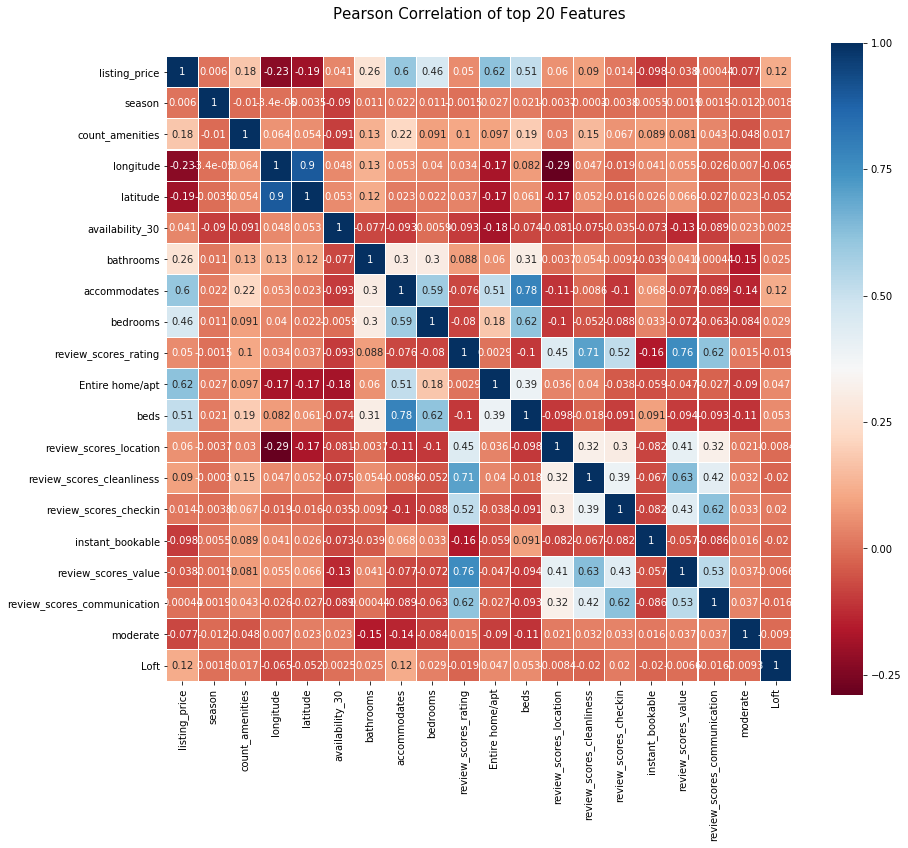

In [399]:
#### getting feature importance 
feature_imp = pd.Series(clf_selected.feature_importances_,index=list(X_train.columns.values)).sort_values(ascending=False)

##### getting top 20 features
top_features=feature_imp.index[:20]

train=X_train[top_features]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of top 20 Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

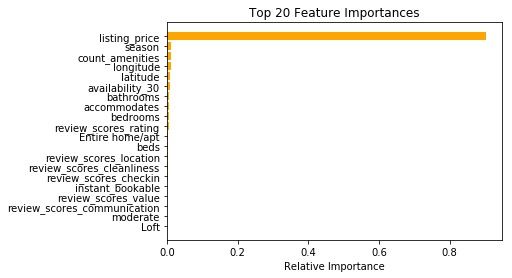

In [400]:
features = top_features
importances = feature_imp[:20]
indices = np.argsort(importances)

plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [401]:
## dropping listing_price

from sklearn.model_selection import train_test_split
df_x=df_train.drop(['daily_price','date','listing_price'],axis=1)
df_y=df_train['daily_price']
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, stratify=df_y,test_size=0.2, random_state=99)


In [402]:
### use the helper to create outputs from the first layer models
from sklearn.metrics import r2_score
helper=StackingHelper()
### use two dictionaries to keep track of the output of different model 
new_features_train={}
new_features_test={}
feature_models=['random_forest','decision_tree','ada_boost','neural_networks']
for model in feature_models:
    print ("current model is", model)
    cur_model=helper.FitModel(model,X_train, y_train)
    cur_prediction_train=helper.Predict(cur_model,X_train)
    cur_prediction_test=helper.Predict(cur_model,X_test)
    new_features_train[model]=cur_prediction_train
    new_features_test[model]=cur_prediction_test
    print('MSE:', mean_squared_error(y_test, cur_prediction_test, multioutput='raw_values'))
    print('r2_score',r2_score(y_test, cur_prediction_test))
    

current model is random_forest
MSE: [3588.95212323]
r2_score 0.6266196695757913
current model is decision_tree
MSE: [3588.23515827]
r2_score 0.6266942597637591
current model is ada_boost
MSE: [3585.05314313]
r2_score 0.6270253039858904
current model is neural_networks


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE: [1001.3750973]
r2_score 0.8958209104299619


In [403]:
### append the outputs of first layer models to training and testing data 
for key in new_features_train:
    X_train[key]=new_features_train[key]

for key in new_features_test:
    X_test[key]=new_features_test[key]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [404]:
#### now train a random forest model with the new training data 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

clf_selected=RandomForestRegressor(max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100,random_state=18,oob_score=True)

#### train the model and make prediction 
clf_selected.fit(X_train,y_train)
y_pred=clf_selected.predict(X_test)

#### model metrics 
print(f'Out-of-bag score estimate: {clf_selected.oob_score_:.3}')
print('MSE:', mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('r2_score',r2_score(y_test, y_pred))

Out-of-bag score estimate: 0.975
MSE: [248.46695696]
r2_score 0.974150484235095


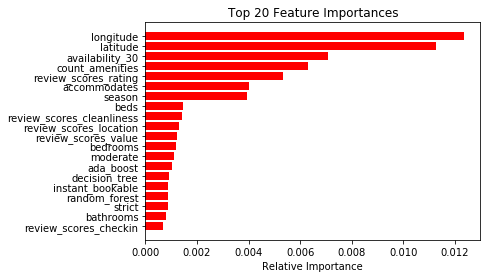

In [409]:
#### getting feature importance 
feature_imp = pd.Series(clf_selected.feature_importances_,index=list(X_train.columns.values)).sort_values(ascending=False)

##### getting top 20 features
top_features=feature_imp.index[1:21]
features = top_features
importances = feature_imp[1:21]
indices = np.argsort(importances)

plt.title('Top 20 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

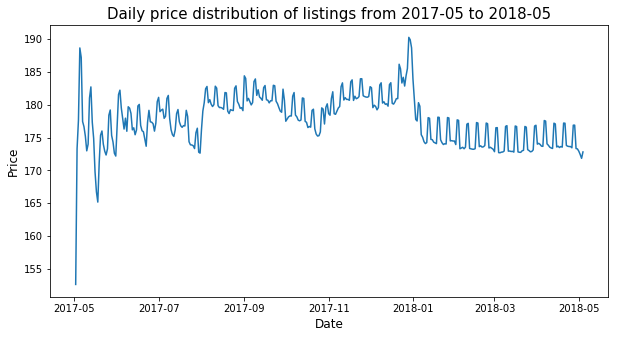

In [367]:
## time series
df_season = new_clean2[["date", "daily_price"]]
group = df_season.groupby([df_season.date]).mean()
train2=group.reset_index()
train2 = train2.set_index('date')
train2.sort_index(inplace=True)
plt.figure(figsize=(10,5))
plt.plot(train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title("Daily price distribution of listings from 2017-05 to 2018-05", fontsize=15)
plt.show()
